# Drawing causal graphs

We show how to draw causal graphs as the ones that appear in the paper.

We include here two examples, the Napkin graph and the Sachs graph.

Note that the graphs in the paper are stylized.

Black: not confounded paths
Red: Non-identifiable confounded paths
Green: identifiable confounded paths

In [2]:
import numpy as np
from decaflow.utils.identifiability import find_confounded_paths, find_identifiable_interventional
from decaflow.utils.example_equations import SachsEquations, NapkinEquations
from decaflow.utils.plot import draw_graph
from decaflow.utils.graphs import adjacency_to_nx
from IPython.display import Image, display
import networkx as nx

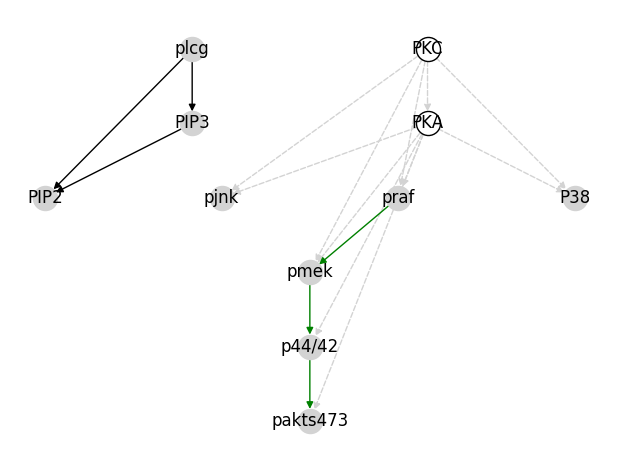

In [2]:
hidden_vars = ['PKC', 'PKA']
causal_equations = SachsEquations()
G = causal_equations.graph

non_confounded_paths, confounded_dict, frontdoor_set = find_confounded_paths(G, hidden_vars, frontdoor=True)
interventional_id_paths = find_identifiable_interventional(G, confounded_dict, hidden_vars)

draw_graph(
    G=G,
    name='sachs',
    hidden_vars=hidden_vars,
    unconfounded_paths=non_confounded_paths,
    interventional_id_paths=interventional_id_paths,
    frontdoor_paths=frontdoor_set,
    separate_frontdoor=False,
    saving_name='sachs_graph')

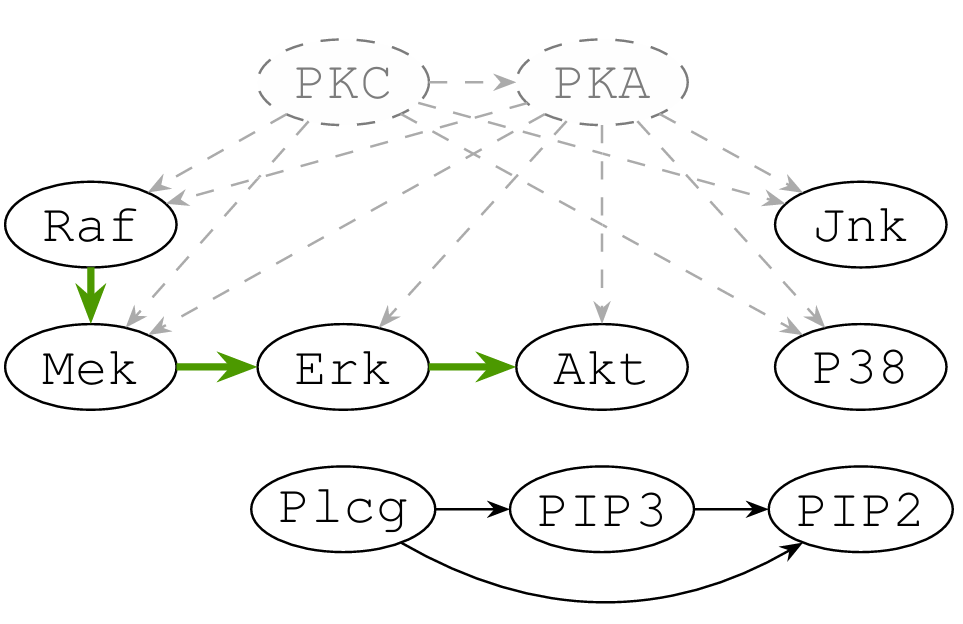

In [3]:

display(Image(filename='../assets/sachs_graph.png'))

C:\Users\Alex\AppData\Local\Temp\ipykernel_62432\3161826773.py:4: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  adjacency -= np.eye(adjacency.shape[0])  # Remove self-loops


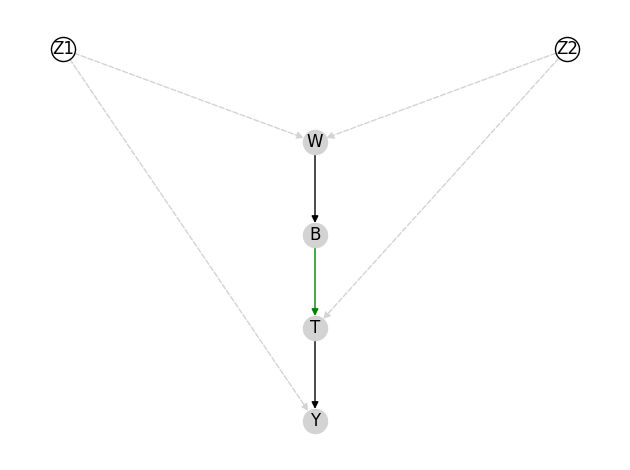

In [4]:
causal_equations = NapkinEquations()
var_names = causal_equations.var_names
adjacency = causal_equations.adjacency
adjacency -= np.eye(adjacency.shape[0])  # Remove self-loops
G, hidden_vars = adjacency_to_nx(adjacency=adjacency, hidden_indices=[0,1], nodelist=var_names)

non_confounded_paths, confounded_dict, frontdoor_set = find_confounded_paths(G, hidden_vars, frontdoor=True)
interventional_id_paths = find_identifiable_interventional(G, confounded_dict, hidden_vars)
draw_graph(
    G=G,
    name='napkin',
    hidden_vars=hidden_vars,
    unconfounded_paths=non_confounded_paths,
    interventional_id_paths=interventional_id_paths,
    frontdoor_paths=frontdoor_set,
    separate_frontdoor=False,
    saving_name='napkin_graph',
)


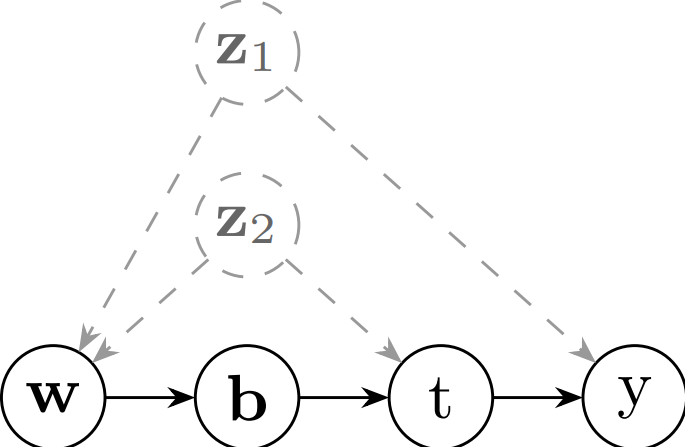

In [5]:
display(Image(filename='../assets/napkin_graph.png'))

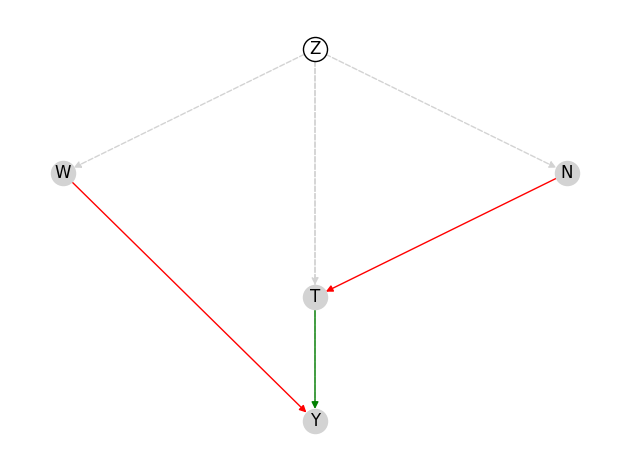

In [7]:
miao_graph = nx.DiGraph()

miao_graph.add_edges_from([
    ('Z', 'W'),
    ('Z', 'T'),
    ('Z', 'N'),
    ('Z', 'Y'),
    ('W', 'Y'),
    ('N', 'T'),
    ('T', 'Y')
])
hidden_vars = ['Z']
non_confounded_set, confounded_dict, frontdoor_set  = find_confounded_paths(miao_graph, hidden_vars, frontdoor=True)
interventional_id_paths = find_identifiable_interventional(miao_graph, confounded_dict, hidden_vars)
draw_graph(
    G=miao_graph,
    name='miao',
    hidden_vars=hidden_vars,
    unconfounded_paths=non_confounded_set,
    interventional_id_paths=interventional_id_paths,
    frontdoor_paths=frontdoor_set,
    separate_frontdoor=False,
    saving_name='miao_graph',
)

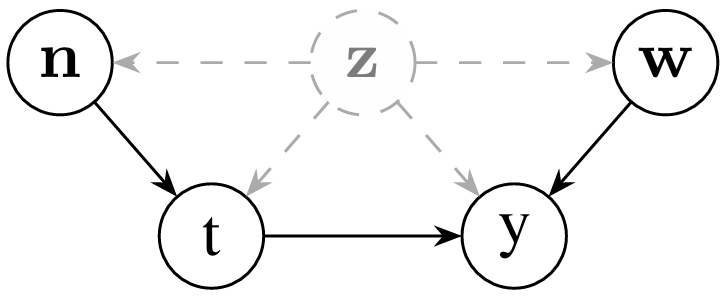

In [5]:
display(Image(filename='../assets/miao_graph.png'))